# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow.keras as keras
import time

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(filename)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

My Plan:
1. Look at the data.
2. Determine which features to drop.
3. Replace missing values in remaining columns.
4. One-hot encode the 'object' columns.

In [4]:
# Peek at data
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [5]:
# Look at the shape
df.shape

(28022, 50)

In [6]:
# Get a summary of the dataframe
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [7]:
# Check the datatypes
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [8]:
# Check which columns have null values
df.columns[df.isna().any()].tolist()

['name',
 'description',
 'neighborhood_overview',
 'host_location',
 'host_about',
 'host_response_rate',
 'host_acceptance_rate',
 'bedrooms',
 'beds']

In [9]:
# Count null values 
nan_count = np.sum(df.isnull())
nan_count

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [10]:
# Create a variable to store NaN values
nan_detected = (nan_count !=0)
nan_detected

name                                             True
description                                      True
neighborhood_overview                            True
host_name                                       False
host_location                                    True
host_about                                       True
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                         True
beds                        

In [11]:
# Check which values are numbers
is_int_or_float = (df.dtypes=='int64') | (df.dtypes=='float64')
is_int_or_float

name                                            False
description                                     False
neighborhood_overview                           False
host_name                                       False
host_location                                   False
host_about                                      False
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                              True
host_total_listings_count                        True
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                     True
bathrooms                                        True
bedrooms                                         True
beds                        

In [12]:
# We will impute NaN values that should be a numeric value
to_impute = nan_detected & is_int_or_float
to_impute

name                                            False
description                                     False
neighborhood_overview                           False
host_name                                       False
host_location                                   False
host_about                                      False
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                         True
beds                        

In [13]:
# These are the columns to impute.
df.columns[to_impute]

Index(['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds'], dtype='object')

In [14]:
# Replace values in these columns:
to_impute_selected = df.columns[to_impute].tolist()

In [15]:
# Indicate whether null
for colname in to_impute_selected:
    df[colname + '_na'] = df[colname].isnull()

In [16]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,host_response_rate_na,host_acceptance_rate_na,bedrooms_na,beds_na
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,3,3,0,0,0.33,9,False,False,True,False
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,1,1,0,0,4.86,6,False,False,False,False
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,1,1,0,0,0.02,3,False,False,False,False
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,1,0,1,0,3.68,4,False,False,False,False
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,1,0,1,0,0.87,7,True,True,False,False


In [17]:
# Create mean and fill values in place
for colname in to_impute_selected:
    col_mean = df[colname].mean()
    df[colname].fillna(col_mean, inplace=True)

In [18]:
# Check if all the values have been imputed
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

host_response_rate missing values count :0
host_acceptance_rate missing values count :0
bedrooms missing values count :0
beds missing values count :0


In [19]:
# List irrelevant features: these features could create bias or do not give us useful info for our model.
irrelevant_features = ['name', 'host_name', 'description', 'neighborhood_overview', 'host_about','host_has_profile_pic', 'reviews_per_month', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']

In [20]:
# Drop irrelevant features
df.drop(columns = (irrelevant_features), inplace = True)

In [21]:
# Columns with missing values that cannot be supplied with a mean
columns_with_missing = ['host_location', 'neighbourhood_group_cleansed','room_type', 'amenities']

In [22]:
# Replace missing values with 'unknown'
replacement_value = 'Unknown'

In [23]:
# Loop to replace the missing values
for col in columns_with_missing:
    df[col].fillna(replacement_value, inplace=True)

In [24]:
# One-hot encode features with 'object' datatype
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['host_location', 'neighbourhood_group_cleansed', 'room_type', 'amenities']

In [25]:
# See how many unique values are in this column
df[to_encode].nunique()

host_location                    1365
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64

In [26]:
# Drop amenities, it has too many unique values 
df.drop(columns = 'amenities', inplace = True)
to_encode.remove('amenities')

In [27]:
# Drop host_location as well
df.drop(columns = 'host_location', inplace = True)
to_encode.remove('host_location')

In [28]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,n_host_verifications,host_response_rate_na,host_acceptance_rate_na,bedrooms_na,beds_na
0,0.800000,0.170000,True,8.0,8.0,True,Manhattan,Entire home/apt,1,1.0,...,False,3,3,0,0,9,False,False,True,False
1,0.090000,0.690000,True,1.0,1.0,True,Brooklyn,Entire home/apt,3,1.0,...,False,1,1,0,0,6,False,False,False,False
2,1.000000,0.250000,True,1.0,1.0,True,Brooklyn,Entire home/apt,4,1.5,...,False,1,1,0,0,3,False,False,False,False
3,1.000000,1.000000,True,1.0,1.0,True,Manhattan,Private room,2,1.0,...,False,1,0,1,0,4,False,False,False,False
4,0.906901,0.791953,True,1.0,1.0,True,Manhattan,Private room,1,1.0,...,False,1,0,1,0,7,True,True,False,False


In [29]:
# Create one-hot encoded columns 

# Create the encoder:
encoder = OneHotEncoder(handle_unknown = "error", sparse = False)

# Apply the encoder:
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))

# Reinstate the original column names:
df_enc.columns = encoder.get_feature_names(to_encode)

In [30]:
df_enc.head()

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Drop the un-encoded columns inplace
df.drop(columns = to_encode, axis = 1, inplace = True)

In [32]:
# Join the original dataframe with the encoded dataframe
df = df.join(df_enc)

In [33]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,...,beds_na,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.800000,0.170000,True,8.0,8.0,True,1,1.0,1.329708,1.0,...,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.090000,0.690000,True,1.0,1.0,True,3,1.0,1.000000,3.0,...,False,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.000000,0.250000,True,1.0,1.0,True,4,1.5,2.000000,2.0,...,False,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.000000,1.000000,True,1.0,1.0,True,2,1.0,1.000000,1.0,...,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.906901,0.791953,True,1.0,1.0,True,1,1.0,1.000000,1.0,...,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'n_host_verifications',
       'host_response_rate_na', 'host_acceptance_rate_na', 'bedrooms

In [35]:
# Make sure we don't have any missing values
missing_values = df.isnull().any()
missing_values

host_response_rate                              False
host_acceptance_rate                            False
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_identity_verified                          False
accommodates                                    False
bathrooms                                       False
bedrooms                                        False
beds                                            False
price                                           False
minimum_minimum_nights                          False
maximum_minimum_nights                          False
minimum_maximum_nights                          False
maximum_maximum_nights                          False
minimum_nights_avg_ntm                          False
maximum_nights_avg_ntm                          False
has_availability                                False
availability_30             

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [36]:
# Define label and features
y = df['review_scores_value']
X = df.drop(columns = 'review_scores_value')

In [37]:
# Take a closer look at the features
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 28022

Number of Features:46
['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'n_host_verifications', 'host_response_rate_na', 'host_acceptance_rate_na', 'bedrooms_na', 'beds_na', 'neighbourhood_group_cleansed_Bronx', 'neighbourhood_group_cl

In [38]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

In [39]:
# Check shape
print(X_train.shape)
print(X_test.shape)

(18774, 46)
(9248, 46)


In [40]:
# Time to fit to a Decision Tree
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    '''
    Fit a Decision Tree regressor to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node 
        depth := The maximum depth of the tree
    '''
    # Create the model object
    model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=leaf)
    
    # Train the decision tree classifier
    model.fit(X_train, y_train)
    
    # Test the model on test data 
    y_predictions = model.predict(X_test)
    
    # Calculate accuracy score
    mse = mean_squared_error(y_test, y_predictions)    

    
    return mse

In [41]:
def train_multiple_trees(max_depth_range, leaf):
    
    # Create empty list for scores
    mse_scores = []

    # Get accuracy scores
    for md in max_depth_range:
        
        # Call train_test_DT
        mse_score = train_test_DT(X_train, X_test, y_train, y_test, leaf, md)
        
        # Print score
        print('Max Depth=' + str(md) + ', MSE score: ' + str(mse_score))
        
        # Append score
        mse_scores.append(mse_score)
        
    return mse_scores

In [42]:
# Visualize our results
def visualize_accuracy(hyperparam_range, acc_scores):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    p = sns.lineplot(x=hyperparam_range, y=mse_scores, marker='o', label = 'Full training set')
        
    plt.title('Test set mse of the model predictions, for ' + ','.join([str(h) for h in hyperparam_range]))
    ax.set_xlabel('Hyperparameter value')
    ax.set_ylabel('MSE')
    plt.show()

In [43]:
# Check to make sure X_train, X_test, y_train, and y_test are good
X_train.isnull().any().sum()

0

In [44]:
X_test.isnull().any().sum()

0

In [45]:
y_train.isnull().any().sum()

0

In [46]:
y_test.isnull().any().sum()

0

Max Depth=1, MSE score: 0.1586387224562828
Max Depth=2, MSE score: 0.10783991152315624
Max Depth=4, MSE score: 0.09025939485459558
Max Depth=8, MSE score: 0.08707989372676773
Max Depth=16, MSE score: 0.09235012358172077
Max Depth=32, MSE score: 0.0933799836915575
Max Depth=64, MSE score: 0.09334535264431071
Max Depth=128, MSE score: 0.09335163523141533
Max Depth=256, MSE score: 0.09338896526309484
Max Depth=512, MSE score: 0.09348935707836627
Max Depth=1024, MSE score: 0.09332858740556187
Max Depth=2048, MSE score: 0.09335712939866002
Max Depth=4096, MSE score: 0.09346866740058568
Max Depth=8192, MSE score: 0.09332547801864637
Max Depth=16384, MSE score: 0.09345554580960234
Max Depth=32768, MSE score: 0.09335086797089255
Max Depth=65536, MSE score: 0.09336722562768512
Max Depth=131072, MSE score: 0.09345558029602224
Max Depth=262144, MSE score: 0.09347259955651037
Max Depth=524288, MSE score: 0.09332741040104534
Max Depth=1048576, MSE score: 0.09349901603736153
Max Depth=2097152, MSE s

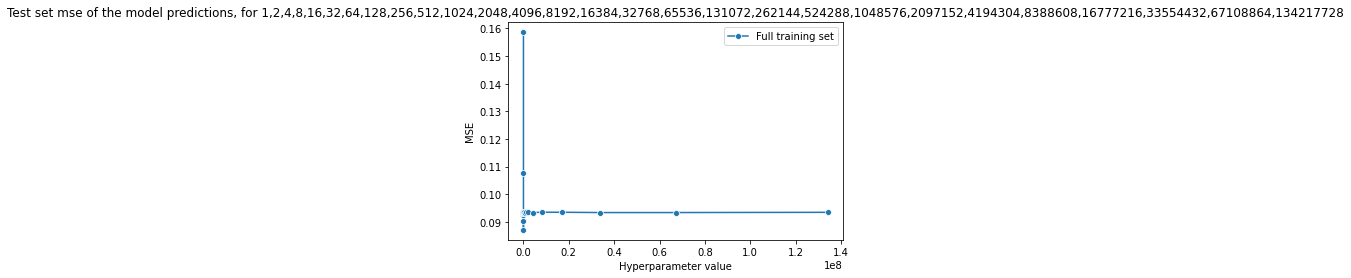

In [47]:
# Choose maximum depth
max_depth_range = [2**i for i in range(28)]
leaf = 15

mse_scores = train_multiple_trees(max_depth_range, leaf)
visualize_accuracy(max_depth_range, mse_scores)


In [48]:
# Check how linear regression performs:

# Create the LinearRegression model object below and assign to variable 'lr_model'
lr_model = LinearRegression()

# Fit the model to the training data below
lr_model.fit(X_train, y_train)

# Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_lr_pred'
y_lr_pred = lr_model.predict(X_test)

# Compute the RMSE and R2 and save the results to lr_rmse and lr_r2
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.27557358742820354
[LR] R2: 0.7201348623077349


In [49]:
# Linear regression does not perform well. 

In [50]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [2, 4, 8, 16],   # Define the maximum depth values to search
    'min_samples_leaf': [1, 5, 10]  # Define the minimum samples per leaf values to search
}

# Create a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best model from the grid search
best_dt_model = grid_search.best_estimator_

# Make predictions using the best model
y_dt_pred = best_dt_model.predict(X_test)

# Calculate RMSE
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)

print("Best Hyperparameters:", best_params)
print("[DT] Root Mean Squared Error:", dt_rmse)

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 10}
[DT] Root Mean Squared Error: 0.30018987151527654


In [51]:
# Gradient boosted decision tree
# Create a gradient boosting regressor model with the best hyperparameters
# that we found
gbdt_model = GradientBoostingRegressor(
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf']
)

# Train the model on the training data
gbdt_model.fit(X_train, y_train)

# Make predictions using the trained model
y_gbdt_pred = gbdt_model.predict(X_test)

# Calculate RMSE
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)

print("[GBDT] Root Mean Squared Error:", gbdt_rmse)

[GBDT] Root Mean Squared Error: 0.27262127808822056
